### Surprise House Advance Regression

* Problem Statement :
-- A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
-- The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


* Business Goal :
-- You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


* Notebook Flow:

    1 Sanity checks

    2 EDA

    3 Data Preparation

    4 Model building and analysis

    5 Conclusion

In [595]:
## Import libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso, LinearRegression

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [291]:
# loading the dataset
# keeping NA as NA and not populating to Nan, reason= since data size is very small, we cannot literally remove nan values.

df = pd.read_csv("train.csv", keep_default_na=False)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


#### 1 Sanity Checks

- We will be checking basic information such as shape, handling null values, conversion of dtypes and stats for dataset.

In [292]:
# checking the shape of dataset
df.shape

(1460, 81)

In [293]:
# Checking for null percentage for each column
(df.isnull().sum()/df.shape[0]) * 100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
                ... 
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces       0.0
FireplaceQu      0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF  

In [294]:
df['FireplaceQu'].unique()

array(['NA', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

- Observation:
- We need to replace the NA to 'None'

In [295]:
# replace NA to None  and check info of dataset

df = df.replace("NA","None")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-

Observation:
- Since the values are replaced by None, we need to check the datatypes of columns 

In [296]:
df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [297]:
# applying for loop to investigate the values and column datatype (comparing with data dictionary)

for i in range(len(df.columns)):
    print(df.columns[i])
    print(df[df.columns[i]].unique())

Id
[   1    2    3 ... 1458 1459 1460]
MSSubClass
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage
['65' '80' '68' '60' '84' '85' '75' 'None' '51' '50' '70' '91' '72' '66'
 '101' '57' '44' '110' '98' '47' '108' '112' '74' '115' '61' '48' '33'
 '52' '100' '24' '89' '63' '76' '81' '95' '69' '21' '32' '78' '121' '122'
 '40' '105' '73' '77' '64' '94' '34' '90' '55' '88' '82' '71' '120' '107'
 '92' '134' '62' '86' '141' '97' '54' '41' '79' '174' '99' '67' '83' '43'
 '103' '93' '30' '129' '140' '35' '37' '118' '87' '116' '150' '111' '49'
 '96' '59' '36' '56' '102' '58' '38' '109' '130' '53' '137' '45' '106'
 '104' '42' '39' '144' '114' '128' '149' '313' '168' '182' '138' '160'
 '152' '124' '153' '46']
LotArea
[ 8450  9600 11250 ... 17217 13175  9717]
Street
['Pave' 'Grvl']
Alley
['None' 'Grvl' 'Pave']
LotShape
['Reg' 'IR1' 'IR2' 'IR3']
LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
Utilities
['AllPub' 'NoSeWa']
LotConfig
['Inside' 'FR2

Observation:

- LotFrontage ,MasVnrArea to be converted to integer/float

In [298]:
# lets convert the columns
# errors = 'coerce' -> If the error argument is passed as coerce , then invalid parsing will be set as NaN

df['LotFrontage'] = pd.to_numeric(df['LotFrontage'],errors='coerce')
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'],errors='coerce')

In [299]:
## checking the dtypes for them
df[['LotFrontage','MasVnrArea']].dtypes

LotFrontage    float64
MasVnrArea     float64
dtype: object

In [300]:
## describe stats of dataset
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Observation
- Since we used Nan to None and later datatypes of some columns were converted to different dtypes (error='coerce').
- So we need to check null values occurences.

In [301]:
## null values check
df_cols = df.isnull().sum()
df_cols[df_cols>0]

LotFrontage    259
MasVnrArea       8
dtype: int64

In [302]:
df[['LotFrontage','MasVnrArea']].describe()

,LotFrontage,MasVnrArea
count,1201.000000,1452.000000
mean,70.049958,103.685262
std,24.284752,181.066207
min,21.000000,0.000000
25%,59.000000,0.000000
50%,69.000000,0.000000
75%,80.000000,166.000000
max,313.000000,1600.000000


In [303]:
## lets replace missing by mean values.
df['LotFrontage'] = df['LotFrontage'].fillna(np.mean(df['LotFrontage']))
df['MasVnrArea'] = df['MasVnrArea'].fillna(np.mean(df['MasVnrArea']))

In [304]:
## getting final check on null values

df_cols = df.isnull().sum()
df_cols[df_cols>0]

Series([], dtype: int64)

Observation:

- The dataset is now cleaned and ready for EDA

#### 2. EDA

- To move with EDA, we need to consider that there is a huge amount for features. Some being numeric and some categorical.
- We can seperate them and then proceed with Univariate/Bi Variate analysis.
- We will check Independent variables and Dependent Variables

In [305]:
df_types = pd.DataFrame(data=df.dtypes)
df_types = df_types.reset_index()
df_types.head()

,index,0
0,Id,int64
1,MSSubClass,int64
2,MSZoning,object
3,LotFrontage,float64
4,LotArea,int64


In [306]:
## getting int64 and float64 data and its count
df_numeric_cols = df_types[(df_types[0]=='int64') |  (df_types[0]=='float64') ]
print("unique values",df_numeric_cols[0].unique())
print("count:",len(df_numeric_cols))

unique values [dtype('int64') dtype('float64')]
count: 37


In [307]:
## getting object data and its count 
df_category_cols = df_types[(df_types[0]=='object') ]
print("unique values",df_category_cols[0].unique())
print("count:",len(df_category_cols))

unique values [dtype('O')]
count: 44


###### For Numerical columns we can use distplot and boxplot to understand the outliers/spread or the distribution of data.

In [308]:
df_numeric_cols['index'].values

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold',
       'YrSold', 'SalePrice'], dtype=object)

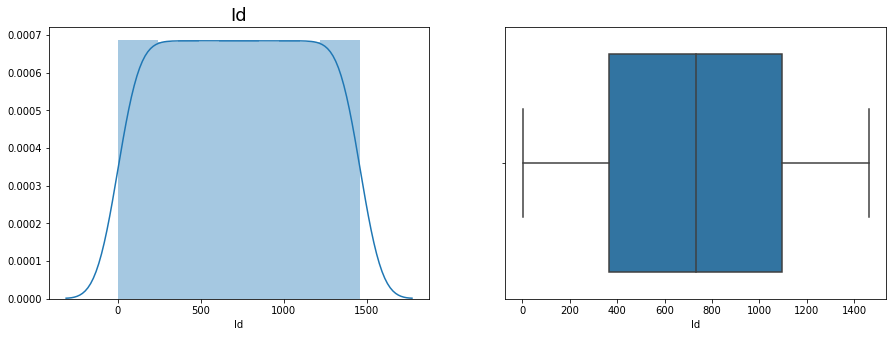

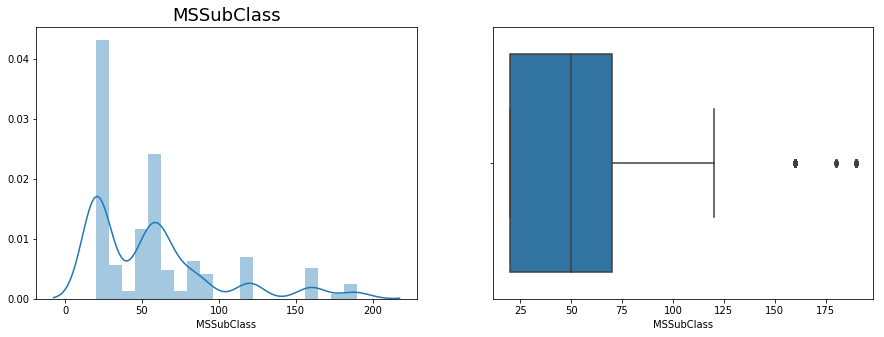

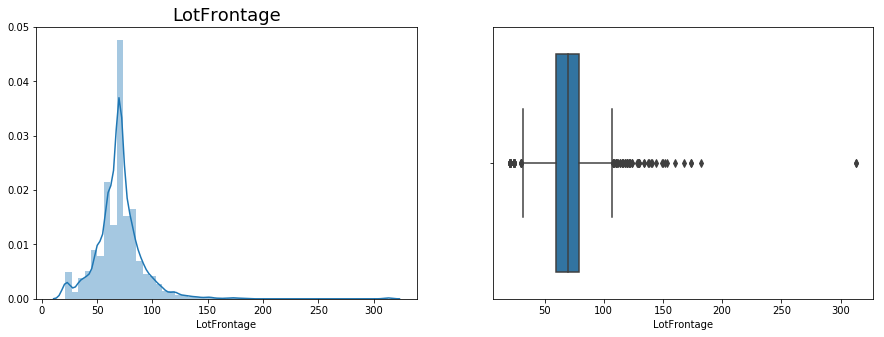

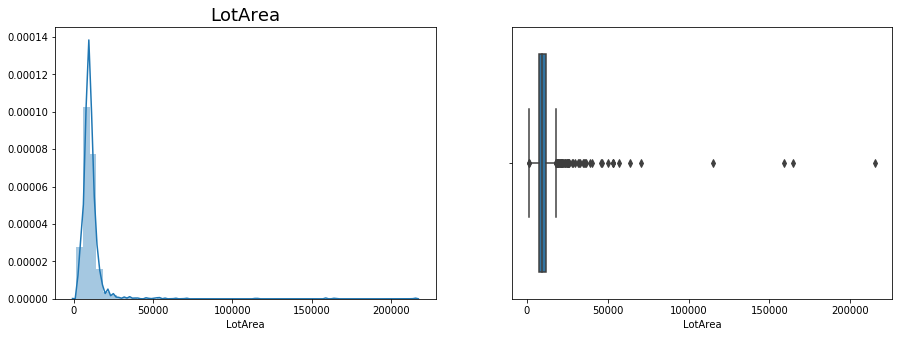

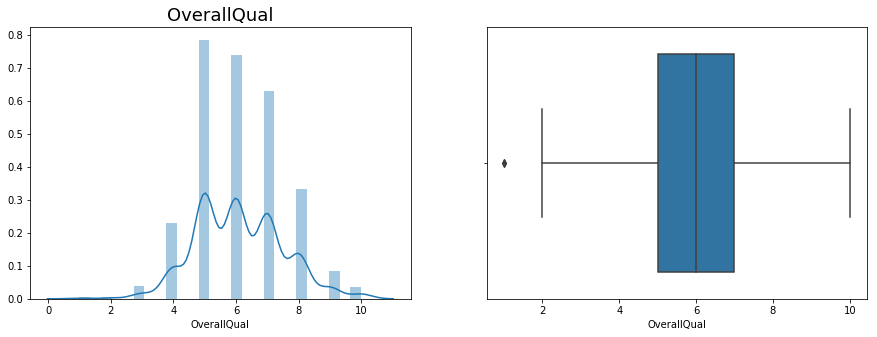

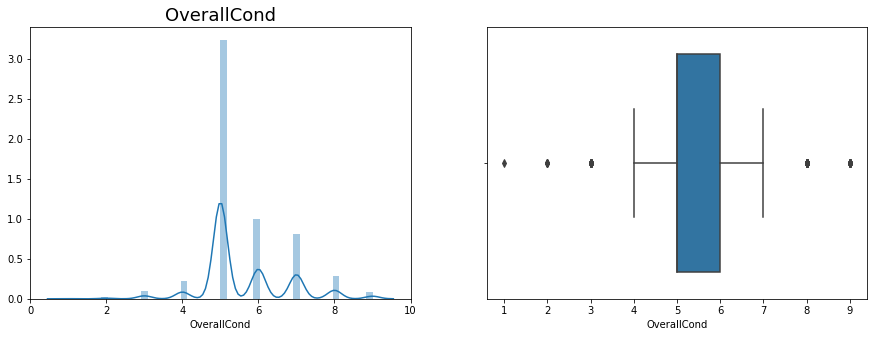

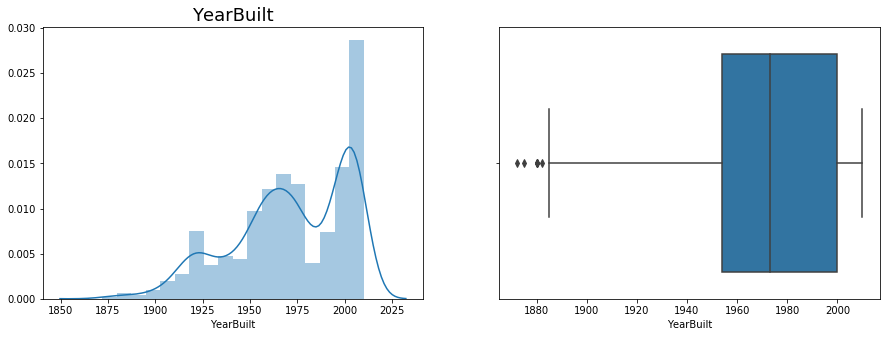

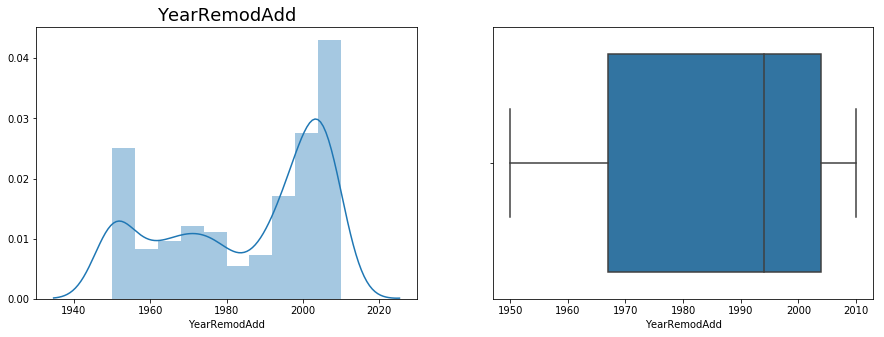

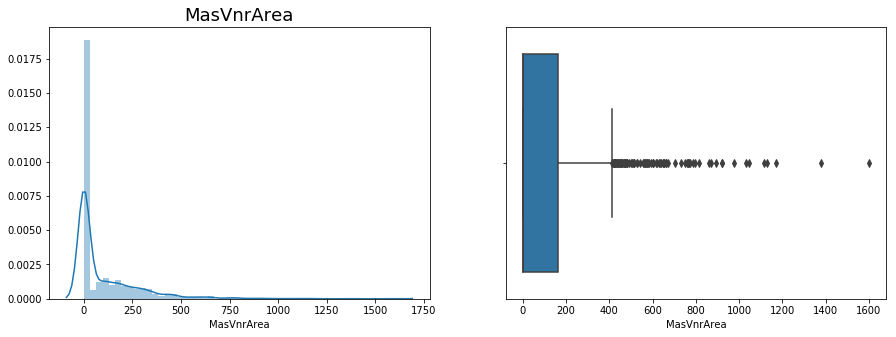

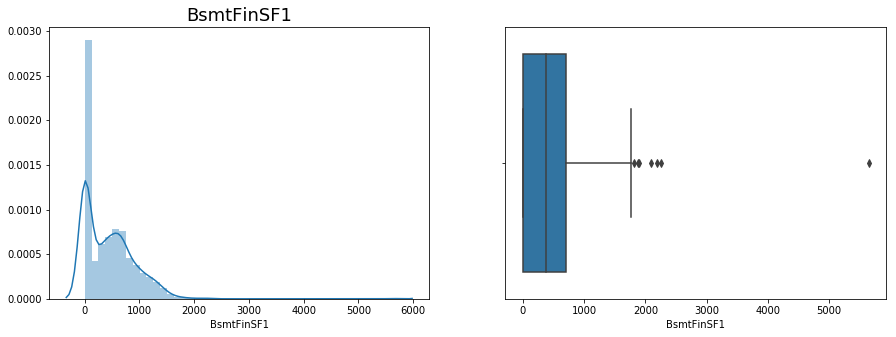

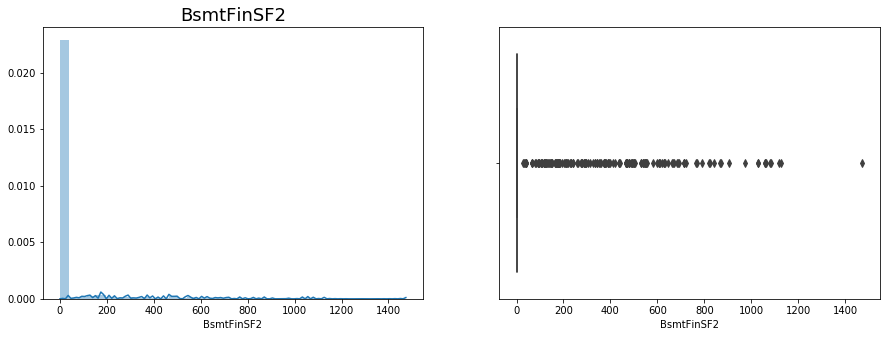

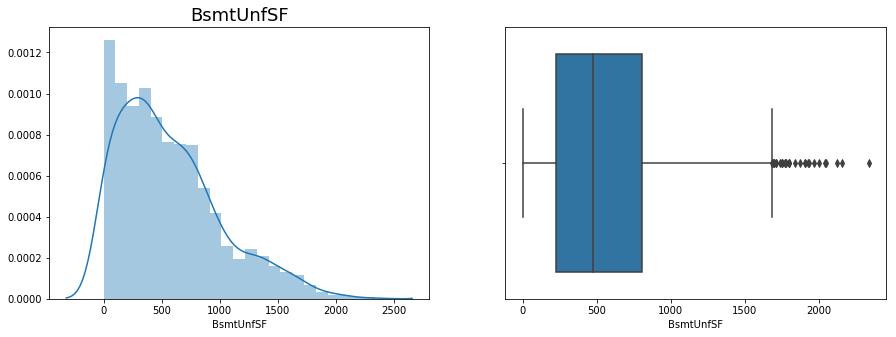

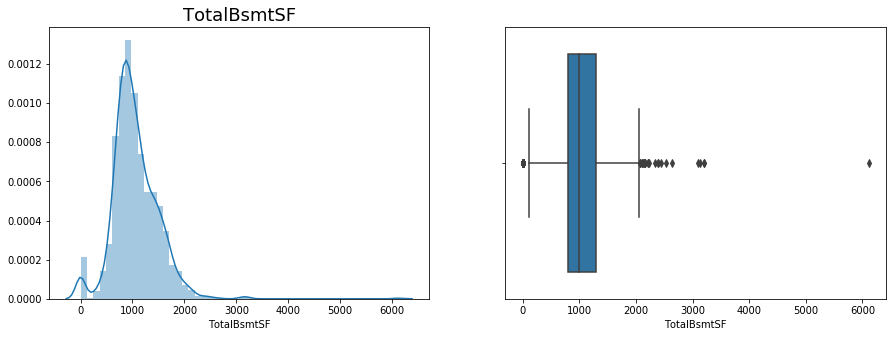

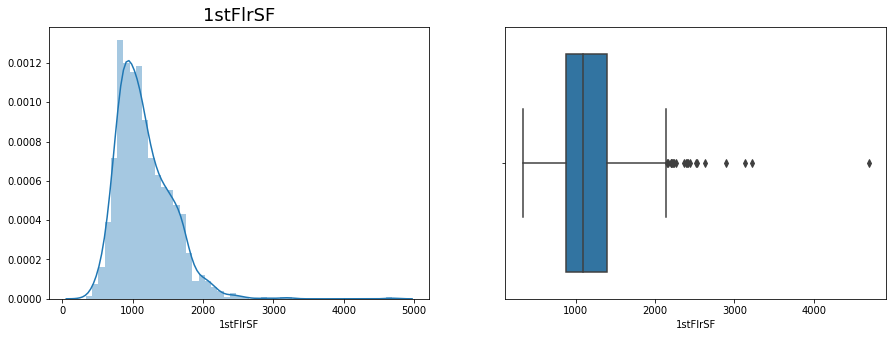

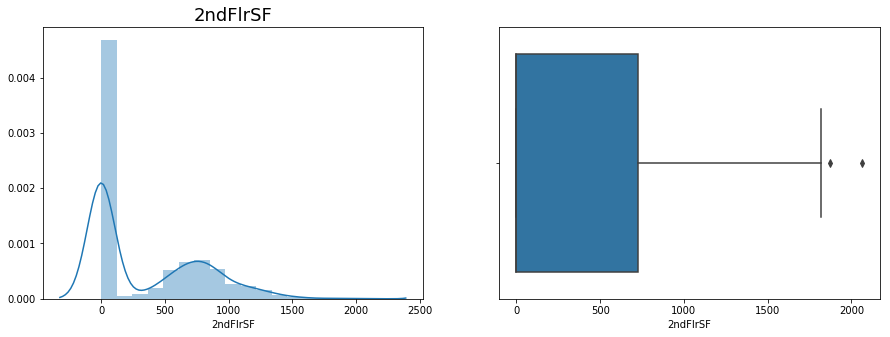

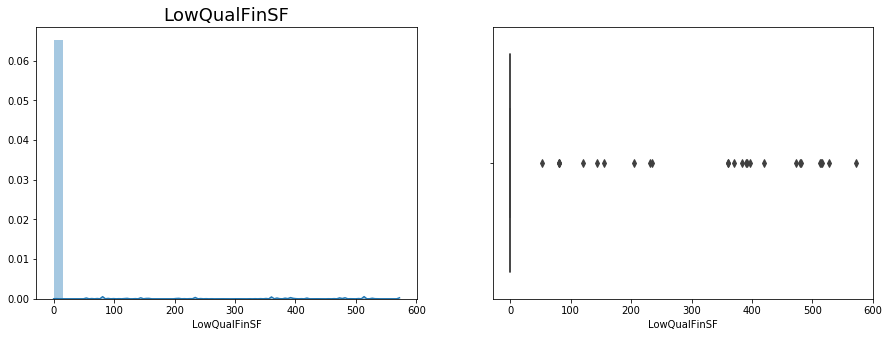

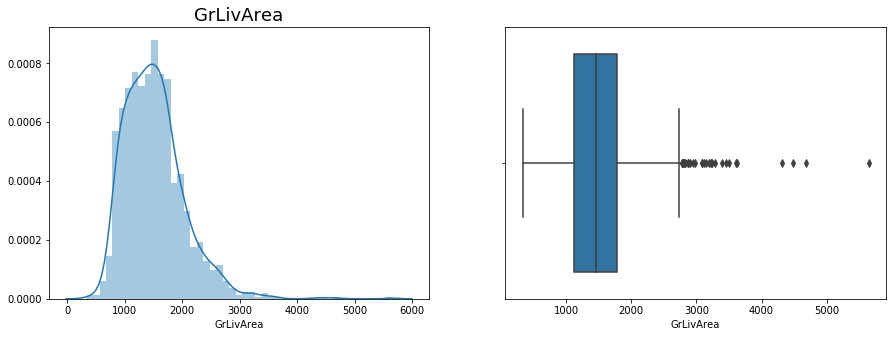

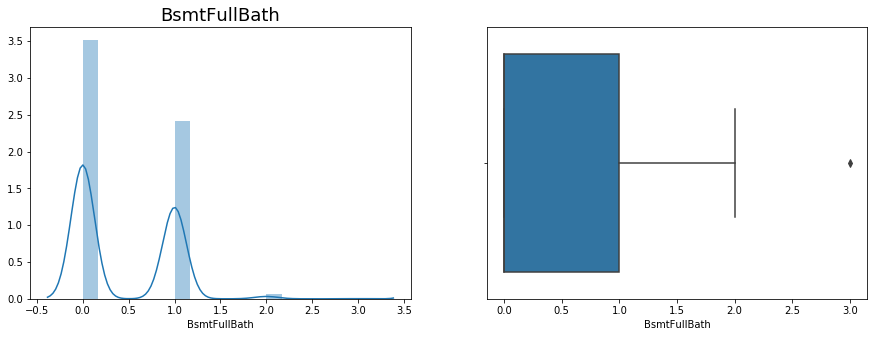

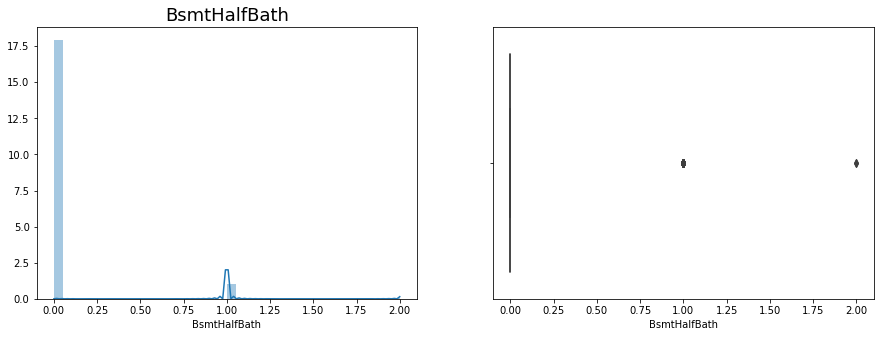

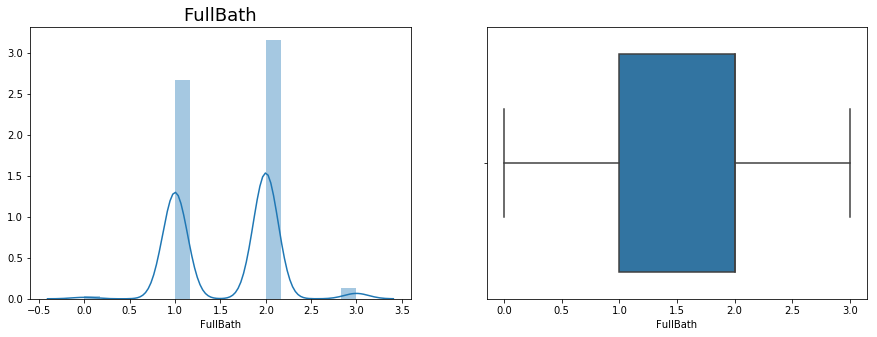

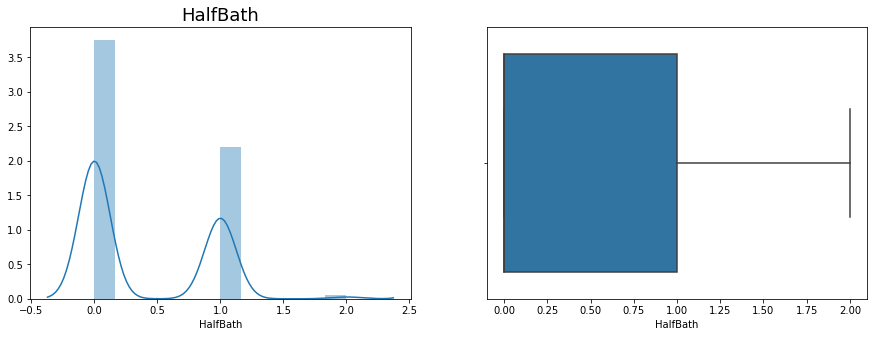

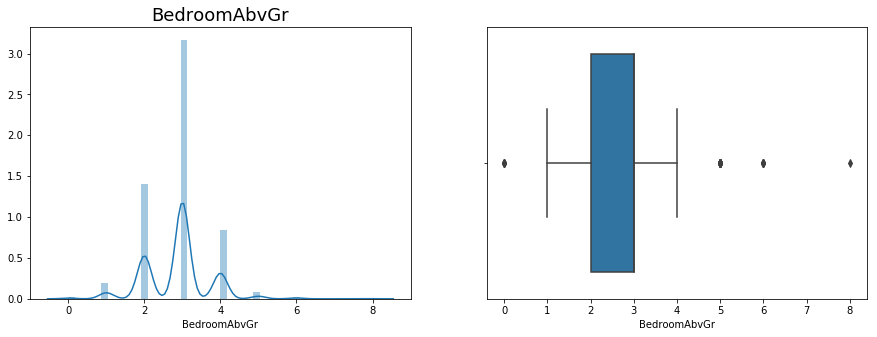

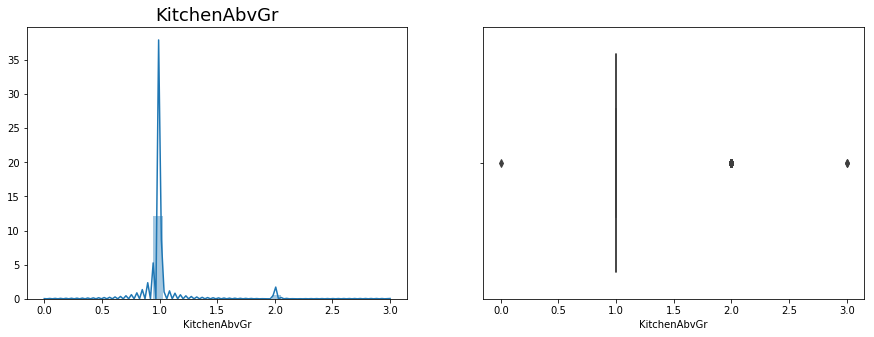

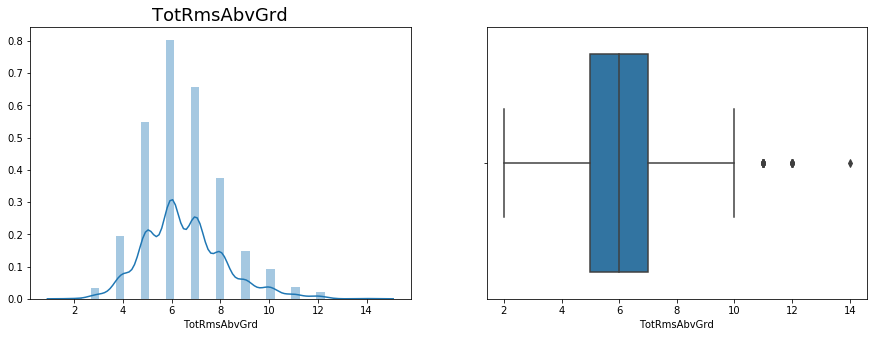

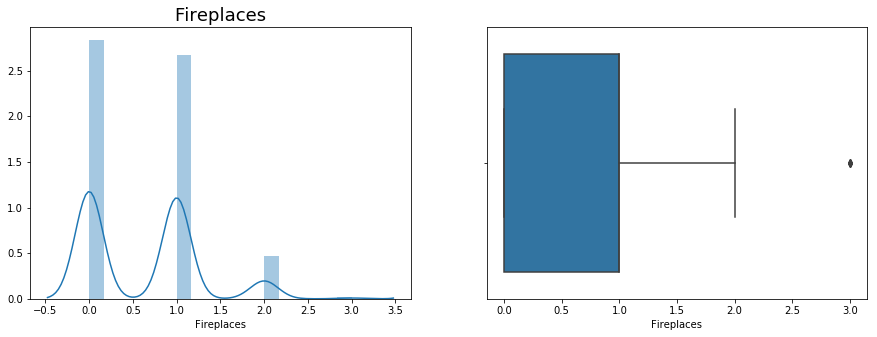

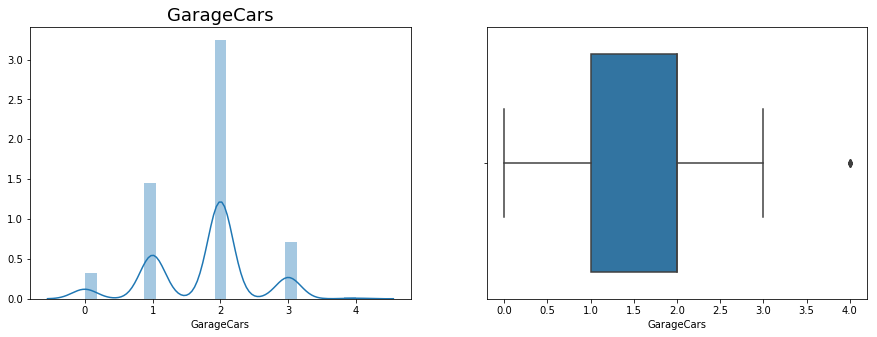

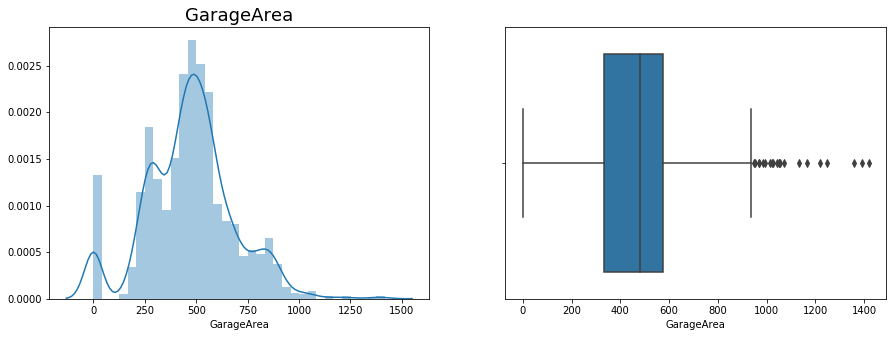

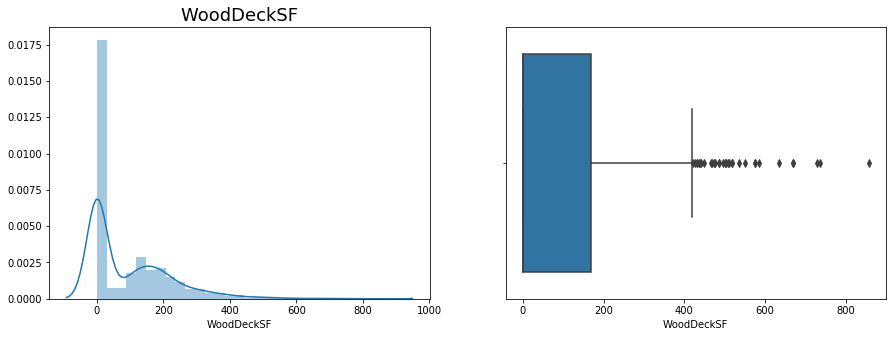

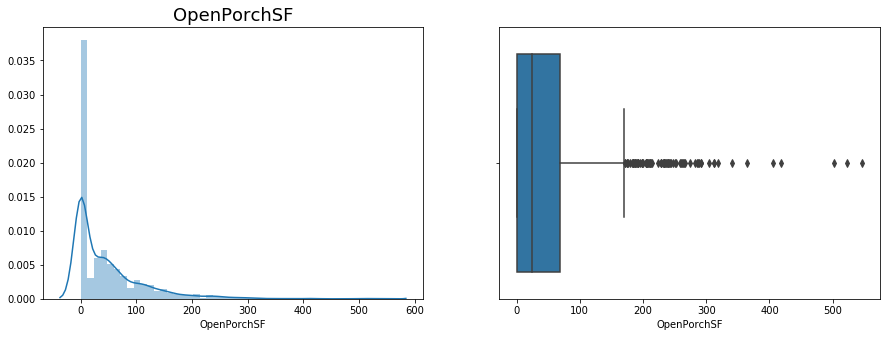

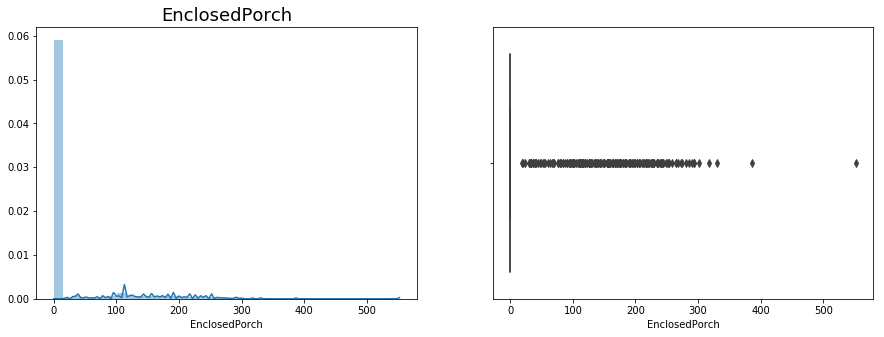

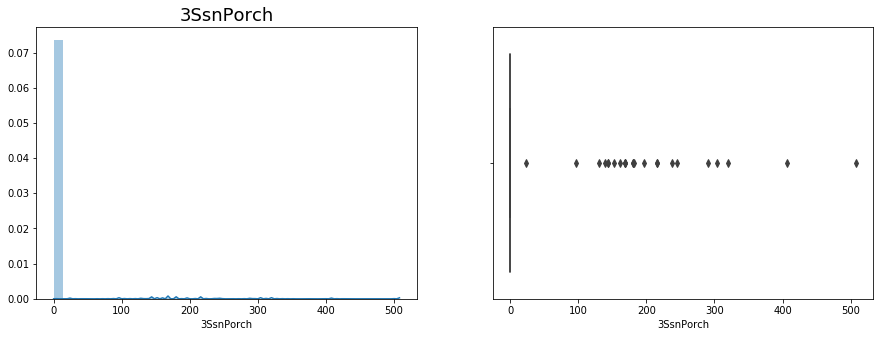

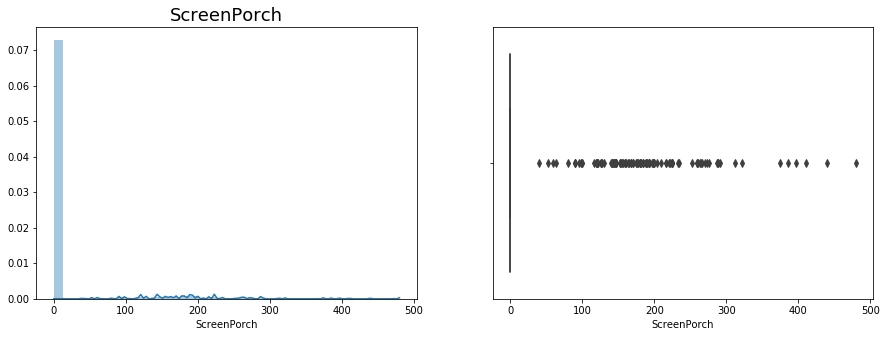

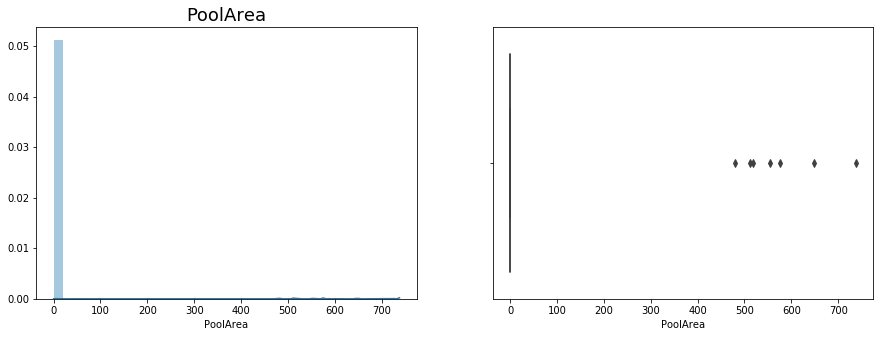

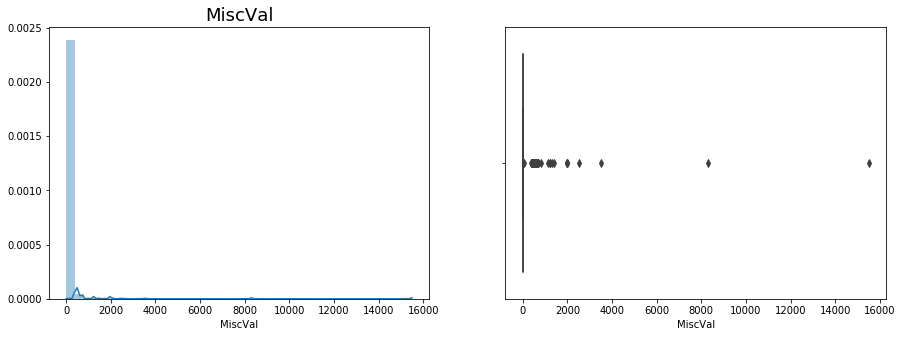

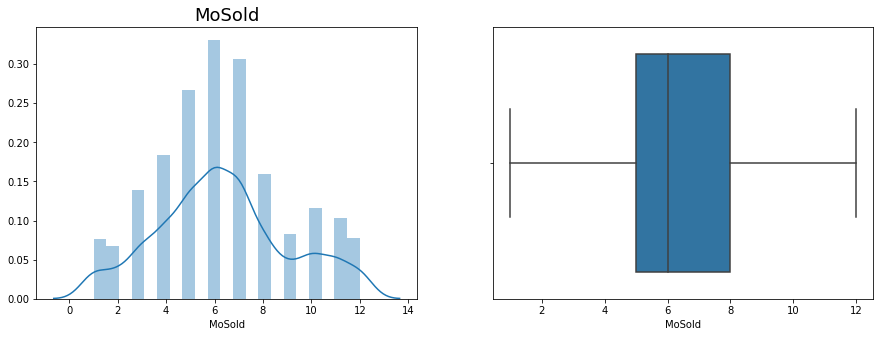

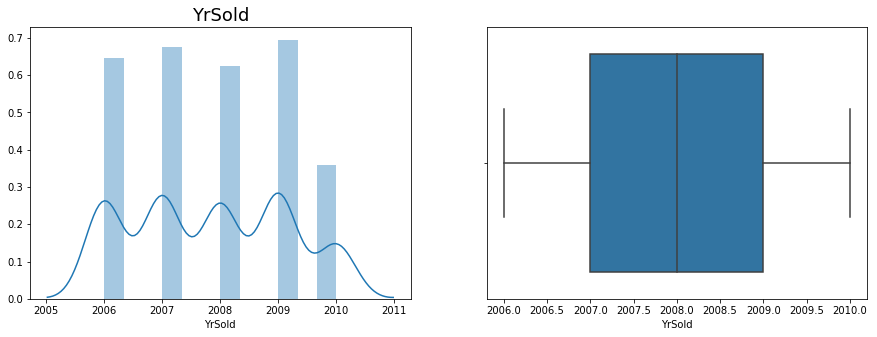

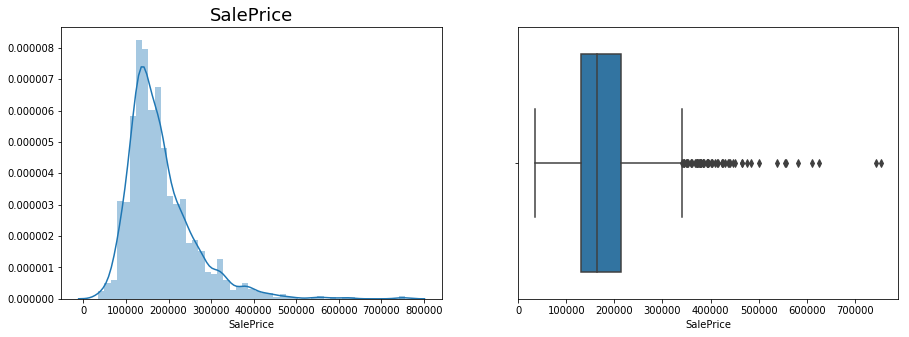

In [309]:
for col in df_numeric_cols['index'].values:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(df[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(df[col])
    plt.show() 

Observation:
- Most of the features have outliers and are not normally distributed.
- Here we cannot directly reject the outliers. The data when compared to data dictionary, shows that values may be valid and removal of them may reduce any information that may be required in predictive analysis

###### Lets check for categorical data based on barplots

In [310]:
df_category_cols['index'].values

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'], dtype=object)

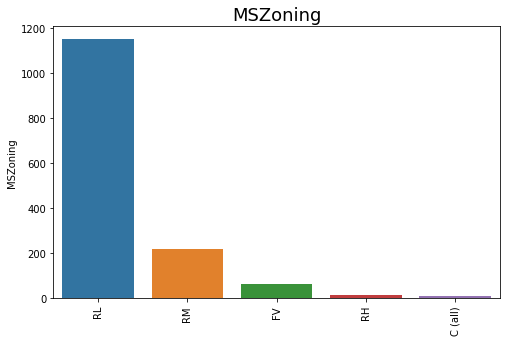

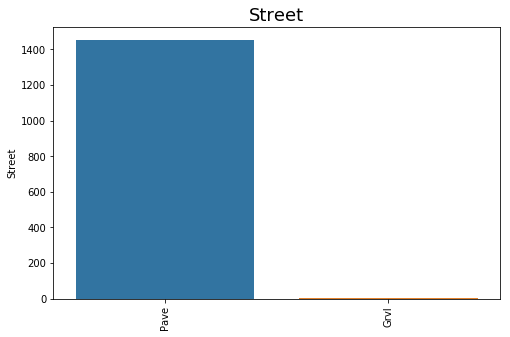

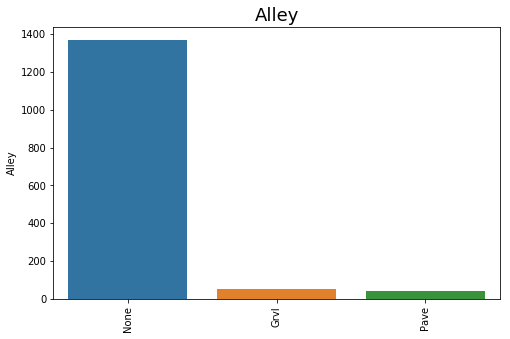

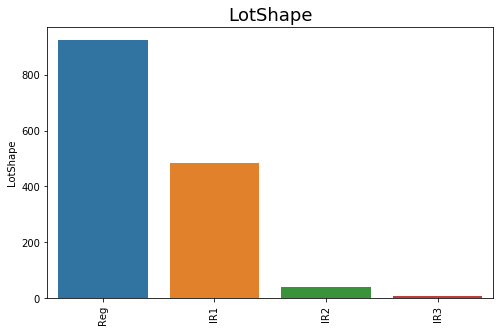

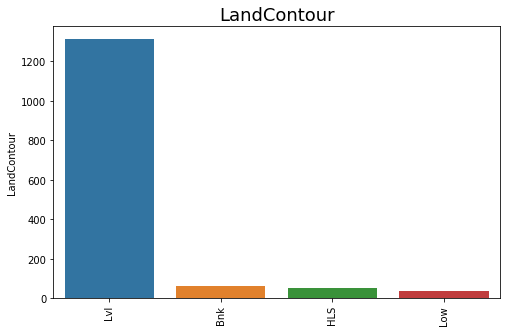

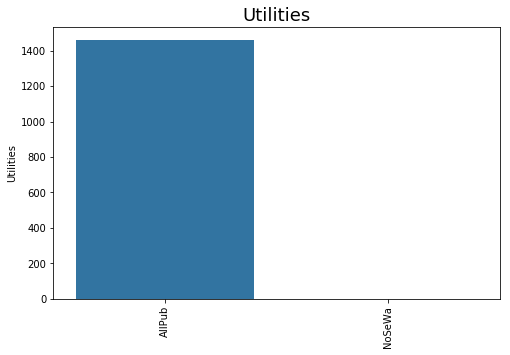

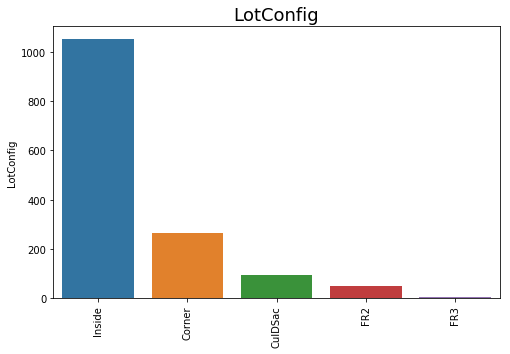

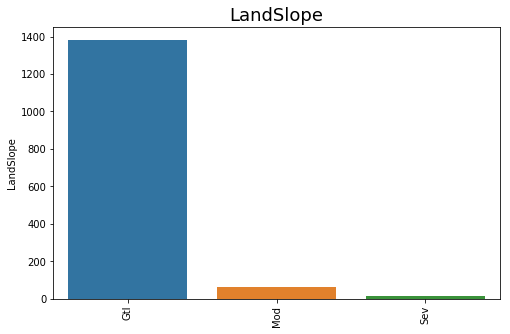

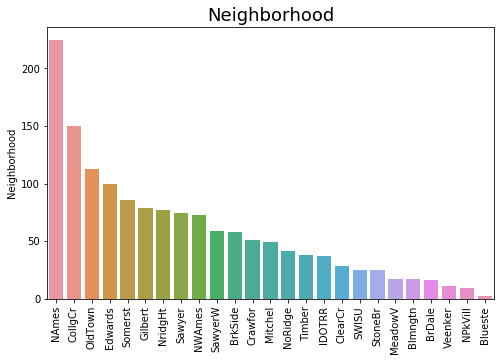

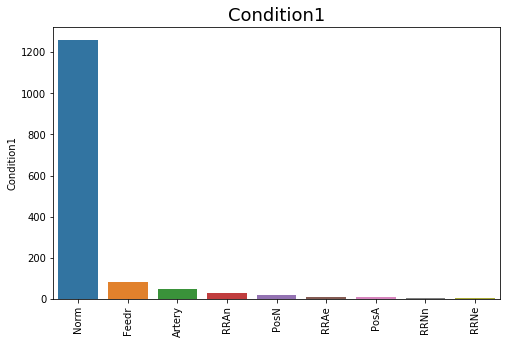

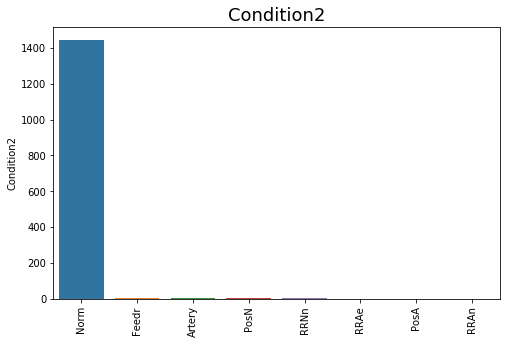

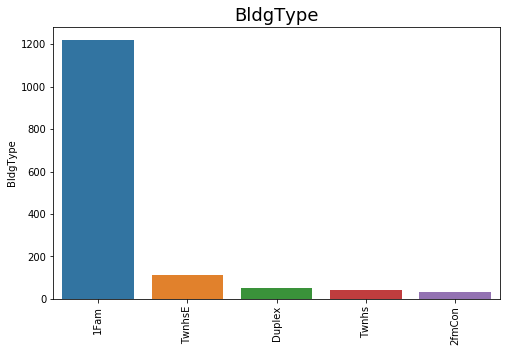

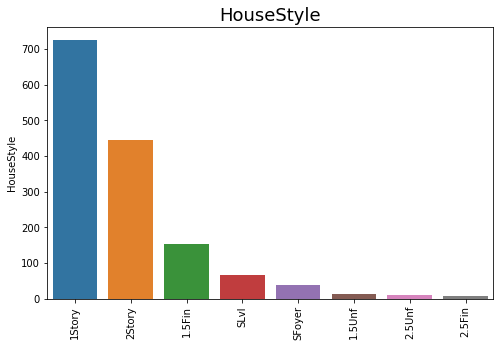

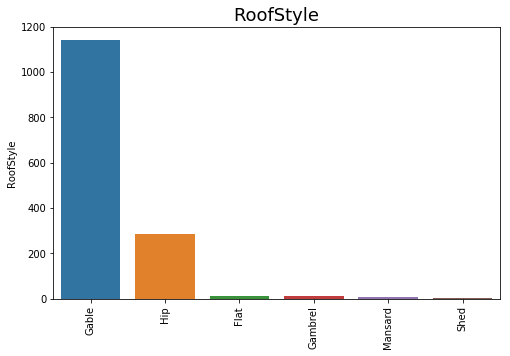

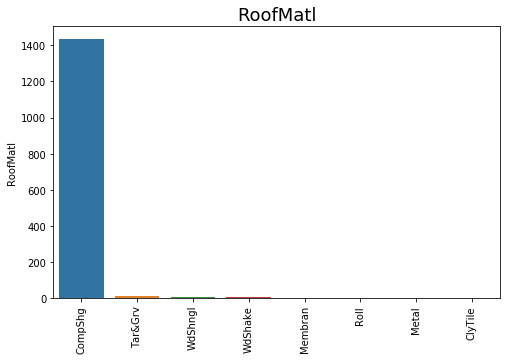

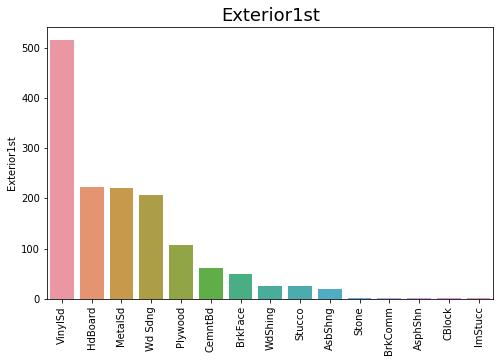

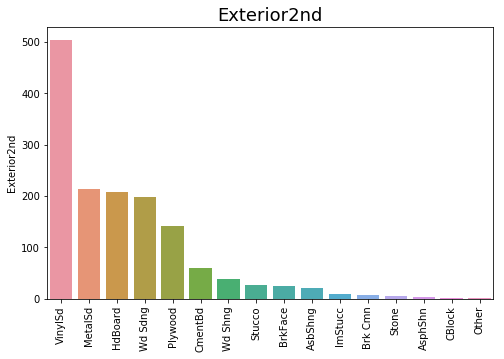

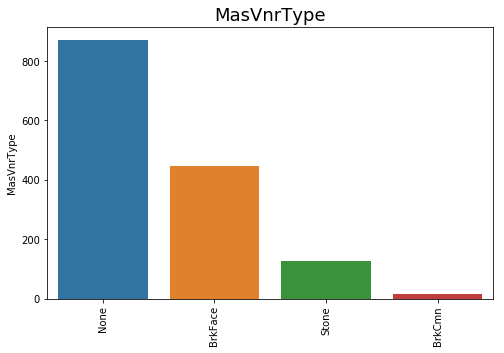

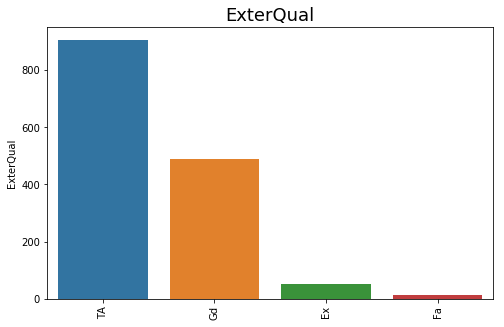

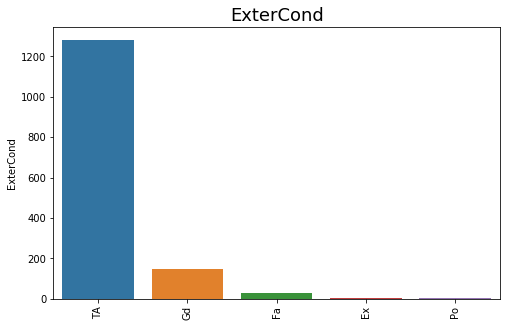

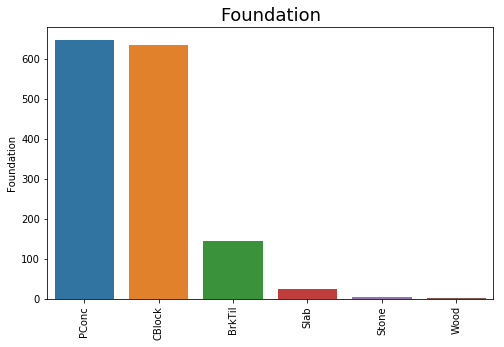

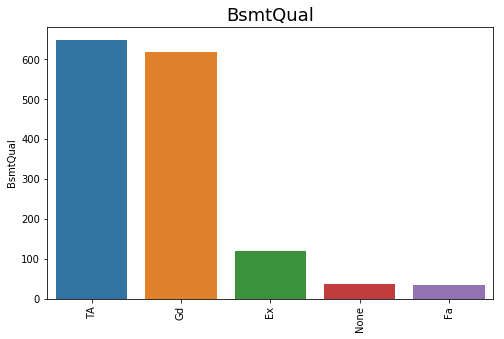

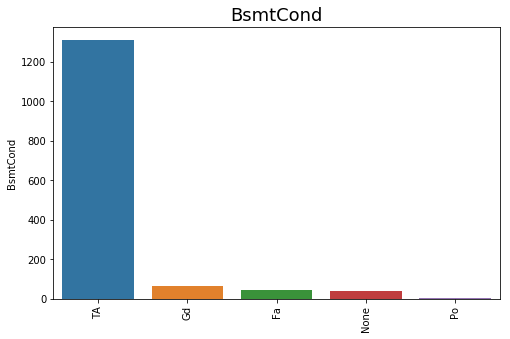

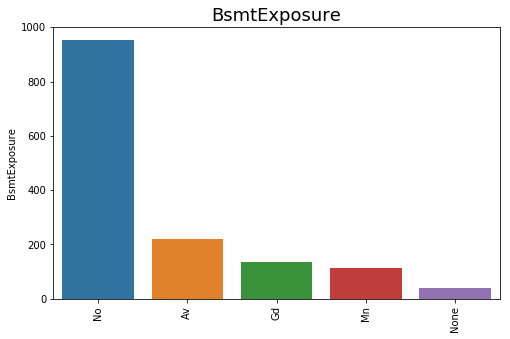

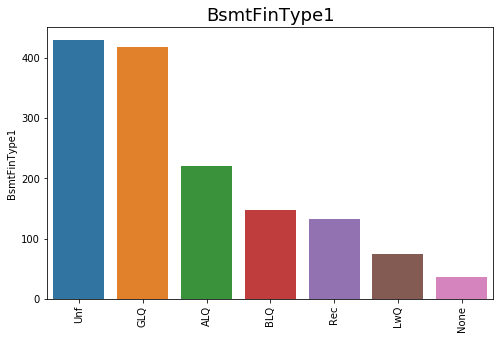

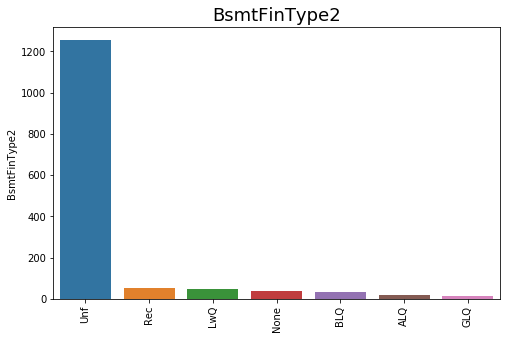

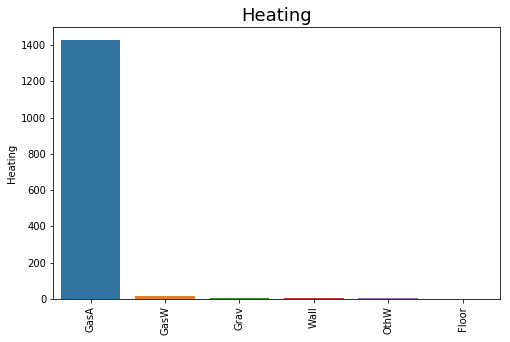

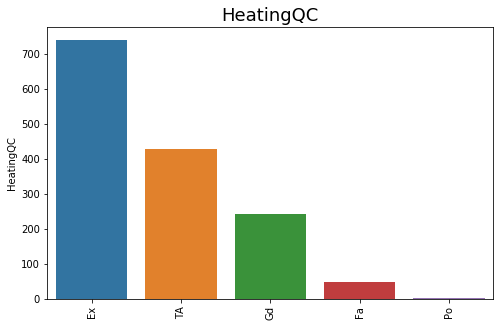

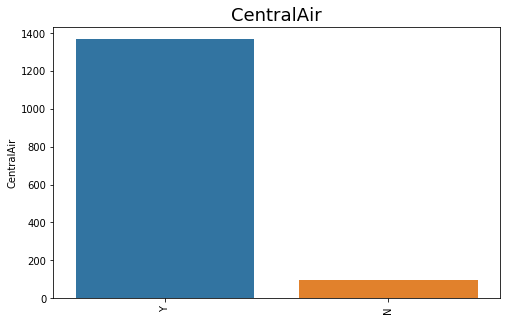

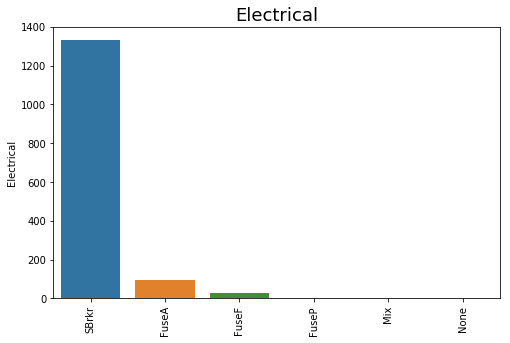

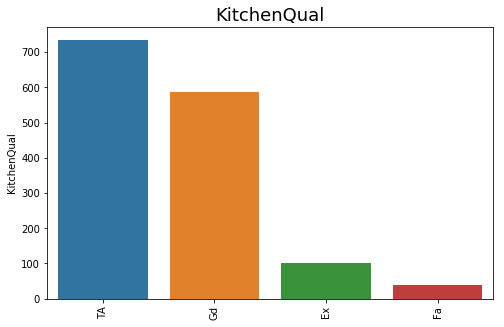

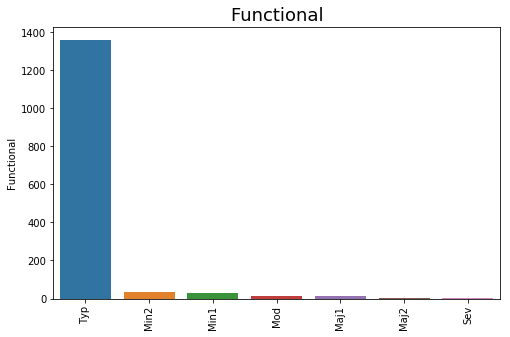

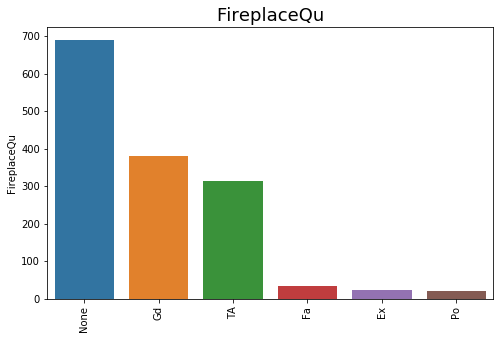

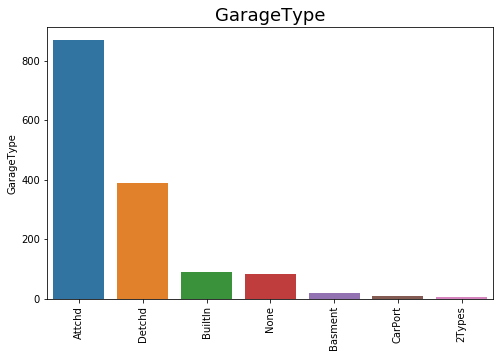

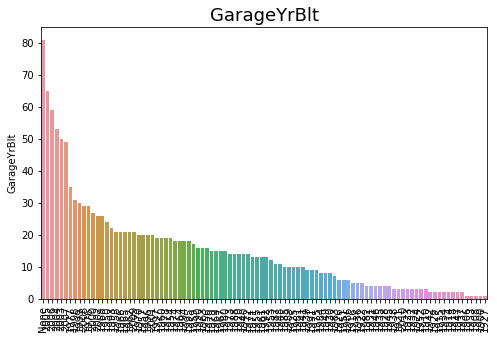

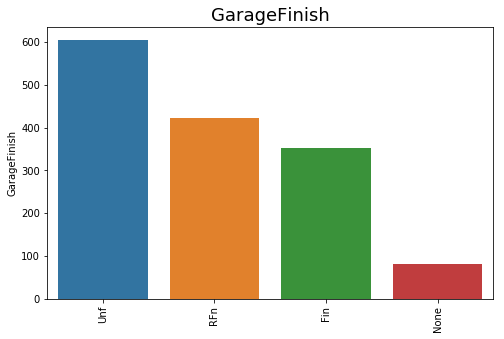

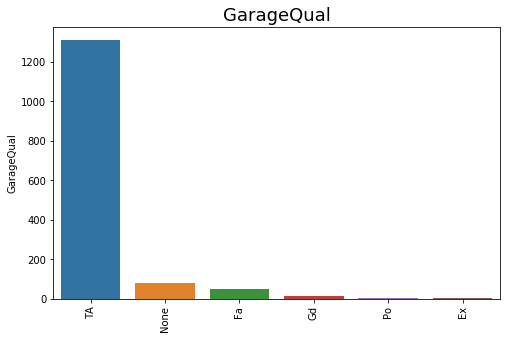

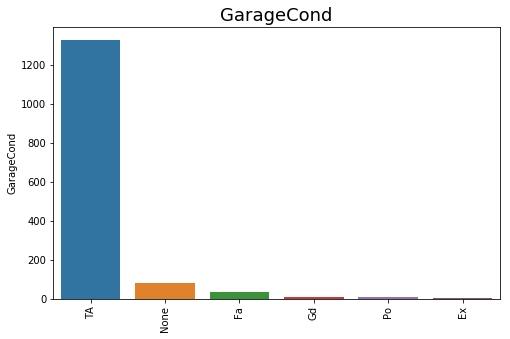

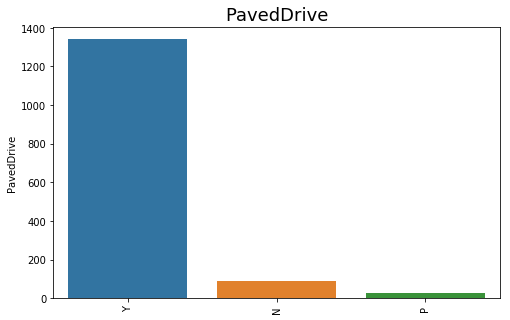

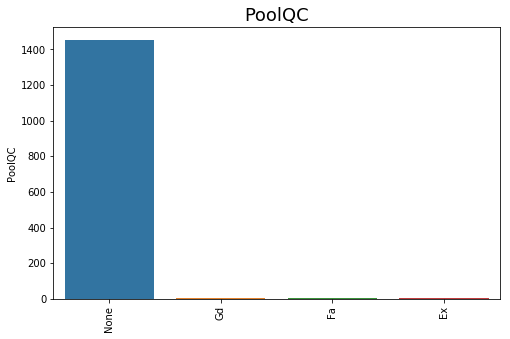

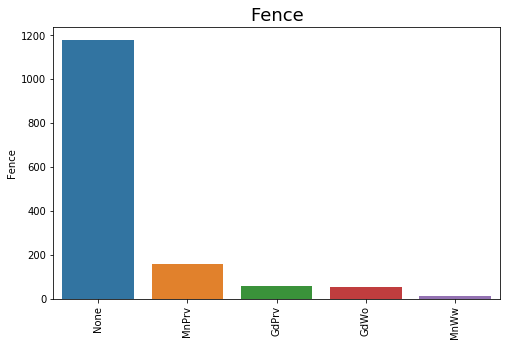

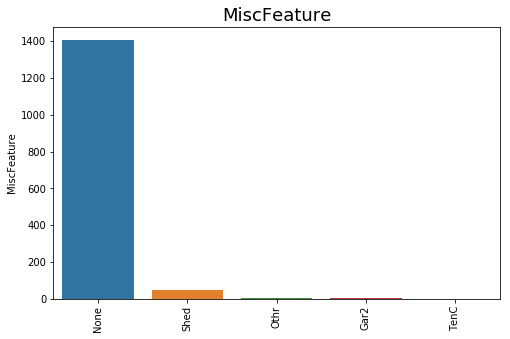

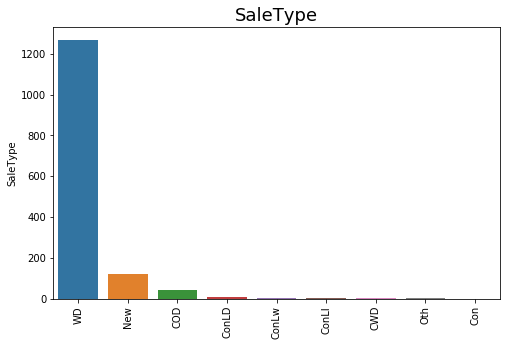

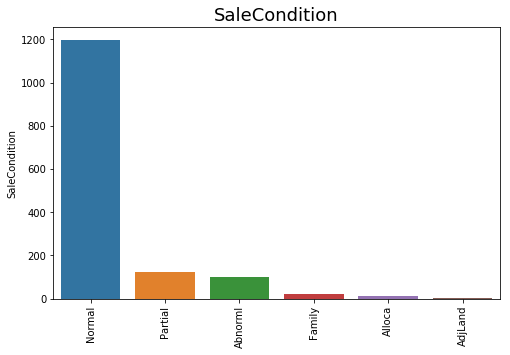

In [311]:
## cehck for ctegorical data 
for col in df_category_cols['index'].values:
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(df[col].value_counts().index, df[col].value_counts())
    plt.xticks(rotation=90)
    plt.show()

###### Lets check the collinearity among numerical features

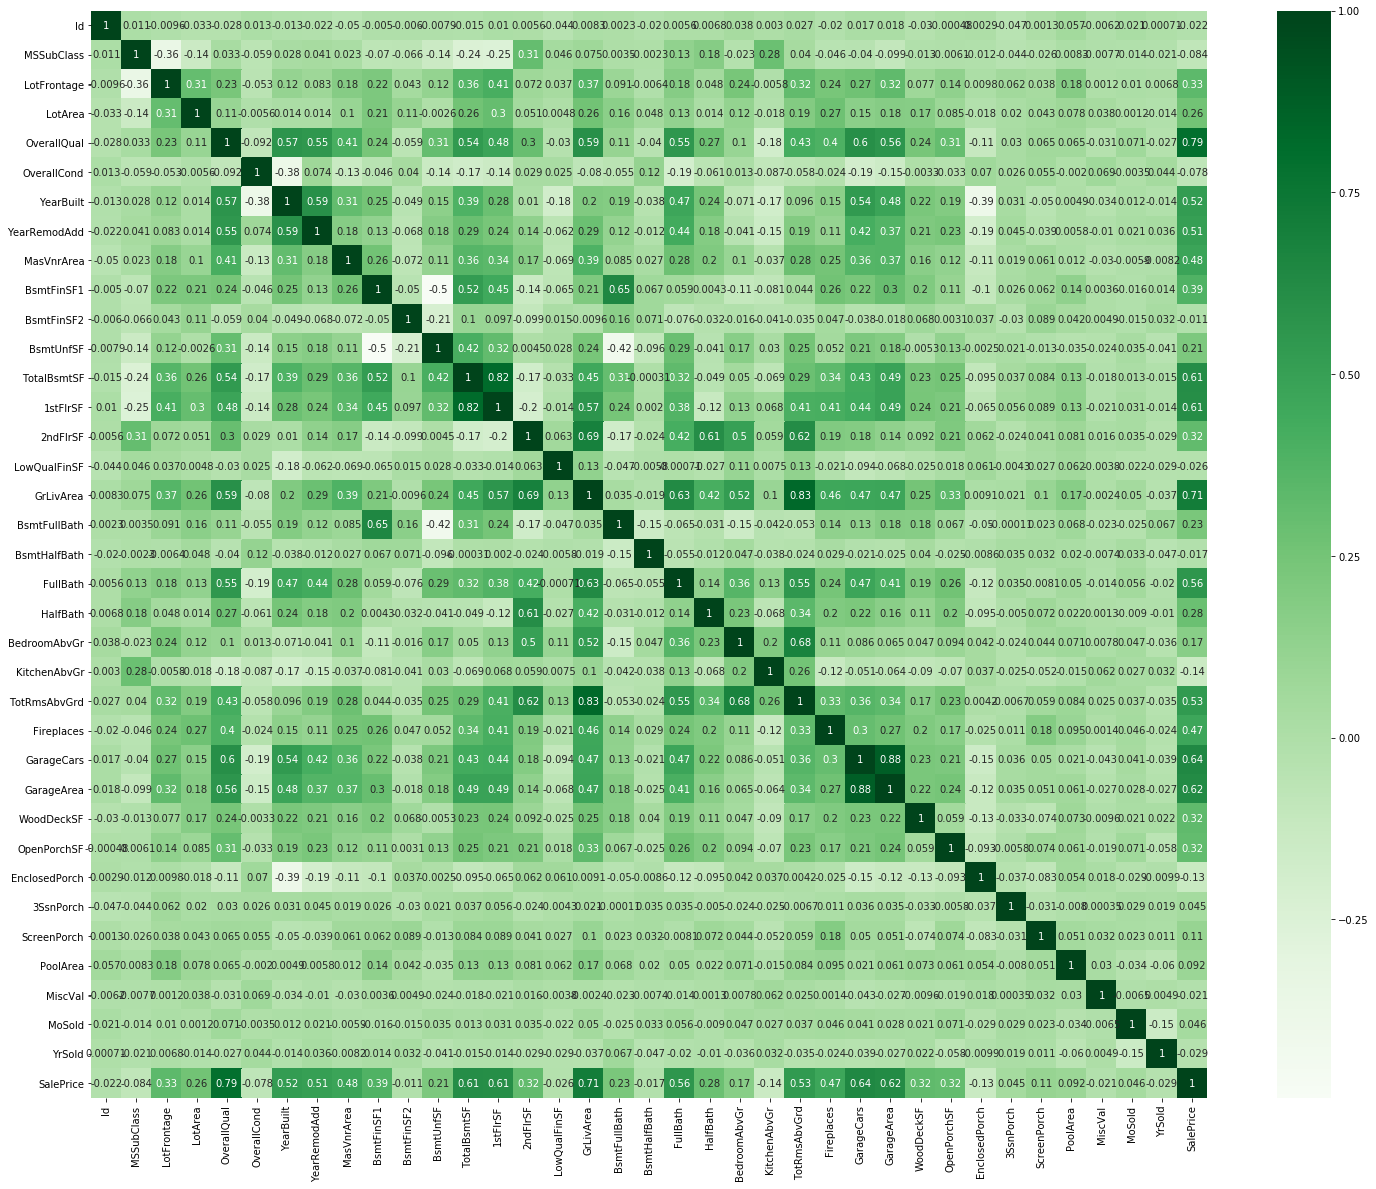

In [312]:
df_num = df[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold',
       'YrSold', 'SalePrice']]

plt.figure(figsize=(25,20))
sns.heatmap(df_num.corr(), annot=True, cmap='Greens')


Observation:
- We see that multiple features have collinearity.
- GarageArea, GarageCars, Fireplaces, TotRmsAbvGr, FullBath, GrLivArea, 1stFirSF,TotalbsmtSF, MasVnrArea, YearRemodAdd, Yearbuilt, OverallQual shows good linear correlation with target- SalePrice.

###### Lets check for Dependent variable - SalePrice

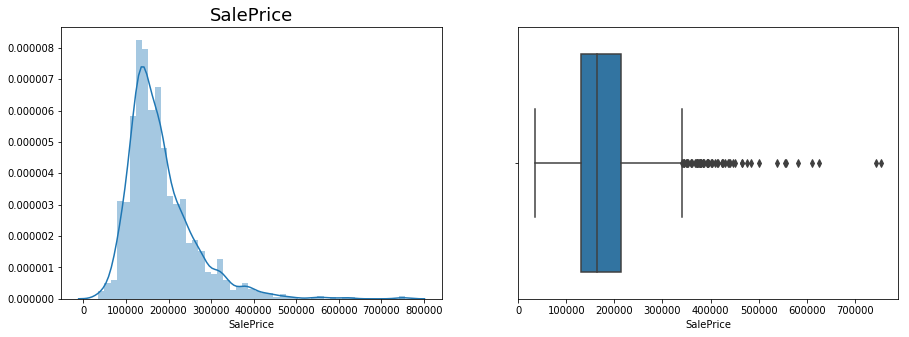

In [596]:
col='SalePrice'
plt.figure(figsize=(15,5))
    
plt.subplot(1,2,1)
plt.title(col, fontdict={'fontsize': 18})
sns.distplot(df[col])
    
plt.subplot(1,2,2)
sns.boxplot(df[col])
plt.show() 

Observtion:
- The SalePrice is not normally distributed and we need to make it normally distributed. 
- The SalePrice will be scaled to norml by using np.log() ahead in Scaling variables tab.

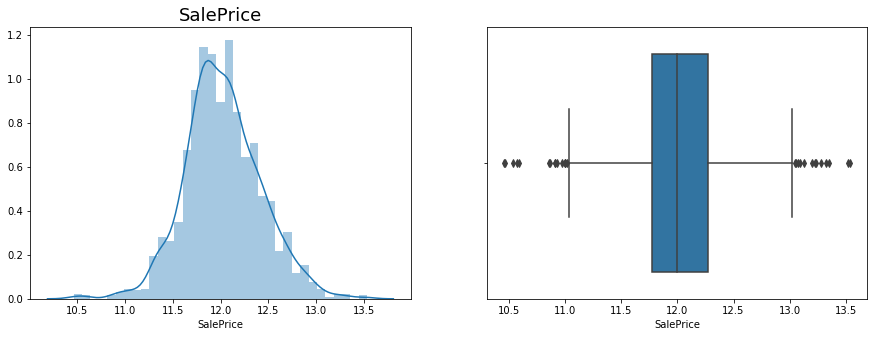

In [597]:
## Visual where SalePrice is Normally distributed for better analysis
plt.figure(figsize=(15,5))
    
plt.subplot(1,2,1)
plt.title(col, fontdict={'fontsize': 18})
sns.distplot(np.log(df['SalePrice']))


#### 3. Data Preparation

In [313]:
# getting shape
df.shape

(1460, 81)

In [314]:
## Seperate the dataframe
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include='object')

In [315]:
# DUMMY variable creation for categorical varicables
# use one hot encoding for categorical variables:  This technique is used for categorical variables where order does not matter.


df_cat_encoded = pd.get_dummies(df_cat, drop_first=True) # dropping column as we analysis n-1 encoded variables
df_cat_encoded.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [316]:
## now concat the features to original
df = pd.concat([df_num,df_cat_encoded],axis=1)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


In [382]:
df_final = df
df_final.shape

(1460, 358)

Observation:
- We have the final dataframe with all required columns and now ready for model preparation.

#### 4. Model building And  Analysis

###### Train, Test Split and scaling variables

In [383]:

# getting X and y variables for splitting data
y = df_final['SalePrice']
df_final = df_final.drop(['SalePrice','Id'],axis=1)
X = df_final

In [384]:
print("Dependent variable: ",y.shape)
print("Independent variables: ",X.shape)

Dependent variable:  (1460,)
Independent variables:  (1460, 356)


In [385]:
## Spilt the data in test and train with 80/20 ratio and getting shape

X_train, X_test,y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.80)
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (1168, 356)
y_train shape (1168,)
X_test shape (292, 356)
y_test shape (292,)


Observation:

- We need to scale the variables, mostly numerical columns so that the model prediction does not face any issue as data will lie on same plane for all variables (Simplicity for model building and prediction)

- We have MinMax Scaler and Standard Scaler. We will use Standard Scaler to Scale the data since most numeric columns are not normally distributed.

- The model might behave badly if the individual features do not more or less look like standard normally distributed data

In [386]:
df_num = df_final.select_dtypes(include=['int64','float64'])
df_num_cols = list(df_num.columns)

In [387]:
print(df_num_cols)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [388]:
## fitting and transforming using Standardscaler

scaler = StandardScaler()
X_train[df_num_cols] = scaler.fit_transform(X_train[df_num_cols])
X_test[df_num_cols] = scaler.transform(X_test[df_num_cols])

Since we have scaled the Independent numerical variables, we need to scale the target variable, in order that all feaatures lie on same splane


In [389]:
# scaling target variable to normally distributed.
y_train = np.log(y_train)
y_test = np.log(y_test)

##### Lets Fit Ridge Regression along with GridSearch Cross Validation

In [603]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.1, 10, 15, 20, 50, 100, 1000]}

ridge_r = Ridge()

# cross validation
ridgecv = GridSearchCV(estimator = ridge_r, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)           

# fitting data on cross validation
ridgecv.fit(X_train, y_train) 


Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 10, 15, 20,
                                   50, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [615]:
# Getting best alpha value
ridgecv.best_params_

{'alpha': 20}

In [669]:
# building model for train data and getting metrics

ridge_reg = Ridge(alpha=20)
ridge_reg.fit(X_train, y_train)

y_train_pred = ridge_reg.predict(X_train)

print ("R2:",r2_score(y_train_pred, y_train))
print("MSE:",mean_squared_error(y_train, y_train_pred))
print("RSS:",np.sum(np.square(y_train - y_train_pred)))

R2: 0.9042482652041386
MSE: 0.012951684813009451
RSS: 15.12756786159504


In [606]:
# predicting model on test data

ridge_reg = Ridge(alpha=20)
ridge_reg.fit(X_train, y_train)

y_test_pred = ridge_reg.predict(X_test)

print("r2:",r2_score(y_test_pred, y_test))
print("mse:",mean_squared_error(y_test, y_test_pred))
print("RSS:",np.sum(np.square(y_test - y_test_pred)))

r2: 0.8752191346047369
mse: 0.019074817096156237
RSS: 5.569846592077621


Observation:
- For Train data, we see the r2=90.42% , mse=0.01 , RSS=15.12
- For Test data, we see the r2=87.52% , mse=0.01 , RSS=5.56
- The testing metric r2 lies with in the +-5% of Train scores.

In [635]:
#getting cross validation results 

ridgecv_results= pd.DataFrame(ridgecv.cv_results_)
ridgecv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.047471,0.012304,0.005187,0.001163,1e-05,{'alpha': 1e-05},0.806129,0.458102,0.606331,0.741387,...,0.660494,0.120458,11,0.955502,0.964318,0.953311,0.962308,0.954398,0.957967,0.004465
1,0.043680,0.008865,0.005387,0.002326,0.0001,{'alpha': 0.0001},0.806374,0.508838,0.625537,0.741600,...,0.674596,0.101975,10,0.955502,0.964315,0.953307,0.962308,0.954398,0.957966,0.004465
2,0.050065,0.012024,0.005585,0.003374,0.001,{'alpha': 0.001},0.808527,0.633459,0.698604,0.743678,...,0.715193,0.058362,9,0.955487,0.964279,0.953185,0.962304,0.954397,0.957930,0.004481
3,0.049069,0.015469,0.003989,0.001669,0.01,{'alpha': 0.01},0.821231,0.705680,0.733160,0.760255,...,0.744034,0.044192,8,0.955138,0.964010,0.952709,0.962038,0.954338,0.957647,0.004504
4,0.045475,0.013961,0.007978,0.009482,0.1,{'alpha': 0.1},0.855951,0.785133,0.738824,0.815176,...,0.788844,0.043103,7,0.951077,0.959541,0.952234,0.956968,0.952891,0.954542,0.003192


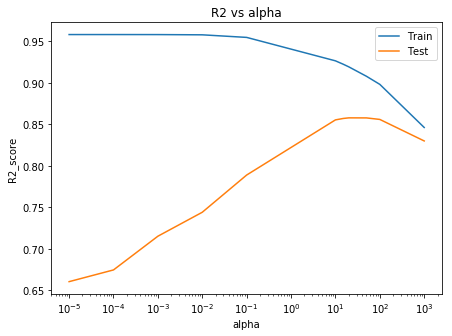

In [629]:
## gettin plot for r2 score vs alpha values in test and train

plt.figure(figsize=(7,5))
plt.plot(ridgecv_results['param_alpha'], ridgecv_results['mean_train_score'], label='Train')
plt.plot(ridgecv_results['param_alpha'], ridgecv_results['mean_test_score'], label='Test')

plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.title("R2 vs alpha")
plt.show()

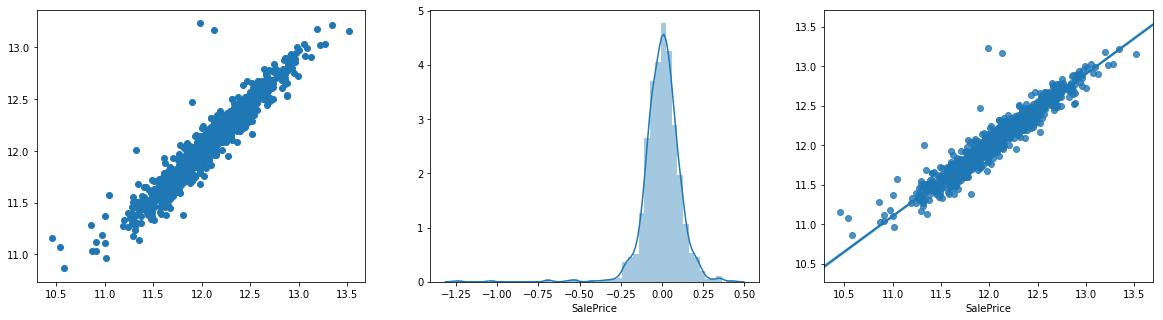

In [637]:
# understanding scatter, normal distribution of errors, line fit visual

res= y_train-y_train_pred

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.scatter(y_train, y_train_pred,)
plt.subplot(1,3,2)
sns.distplot(res)
plt.subplot(1,3,3)
sns.regplot(y_train, y_train_pred)

Observation:
- We see that the straight line fits very nicely on plane.
- The errors do follow normal distribution.

##### Lets fit Lasso model along with GridSearch Cross Validation

In [633]:
lasso_reg = Lasso()

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1.0]}

lassocv = GridSearchCV(estimator = lasso_reg, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)

lassocv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    4.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.5,
                                   1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [634]:
lassocv.best_params_

{'alpha': 0.001}

In [663]:
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

y_train_pred = lasso_reg.predict(X_train)

print ("R2:",r2_score(y_train_pred, y_train))
print("MSE:",mean_squared_error(y_train, y_train_pred))
print("RSS:",np.sum(np.square(y_train - y_train_pred)))

R2: 0.8863716819626194
MSE: 0.015163422042490556
RSS: 17.710876945628968


In [565]:
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

y_test_pred = lasso_reg.predict(X_test)

print ("R2:",r2_score(y_test_pred, y_test))
print("MSE:",mean_squared_error(y_test, y_test_pred))
print("RSS:",np.sum(np.square(y_test - y_test_pred)))

R2: 0.8654995565763834
MSE: 0.0201730919274114
RSS: 5.890542842804129


Observation:
- For Train data, we see the r2=88.63% , mse=0.01 , RSS=17.71
- For Test data, we see the r2=86.54% , mse=0.02 , RSS=5.89
- The testing metric r2 lies with in the +-5% of Train scores.

In [577]:
#getting cross validation results 

lassocv_results= pd.DataFrame(lassocv.cv_results_)
lassocv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.715289,0.317054,0.004593,0.000796,0.0001,{'alpha': 0.0001},0.885507,0.823114,0.751729,0.843788,...,0.791180,0.082072,3,0.946275,0.954991,0.947401,0.951798,0.948807,0.949855,0.003165
1,0.157379,0.014527,0.005785,0.001935,0.001,{'alpha': 0.001},0.889860,0.848219,0.759449,0.908922,...,0.850651,0.051520,1,0.902009,0.911392,0.920503,0.903004,0.911392,0.909660,0.006729
2,0.046272,0.005518,0.004189,0.000746,0.01,{'alpha': 0.01},0.874398,0.814938,0.738079,0.882499,...,0.835683,0.054267,2,0.851836,0.862529,0.881336,0.844607,0.854138,0.858889,0.012597
3,0.039295,0.006872,0.004390,0.000492,0.05,{'alpha': 0.05},0.814675,0.753731,0.713195,0.791907,...,0.777370,0.038921,4,0.777040,0.794761,0.809295,0.781476,0.781814,0.788877,0.011801
4,0.030519,0.006232,0.005185,0.002130,0.1,{'alpha': 0.1},0.698439,0.673829,0.628133,0.683572,...,0.676812,0.026206,5,0.670225,0.694575,0.686175,0.680898,0.683415,0.683058,0.007897


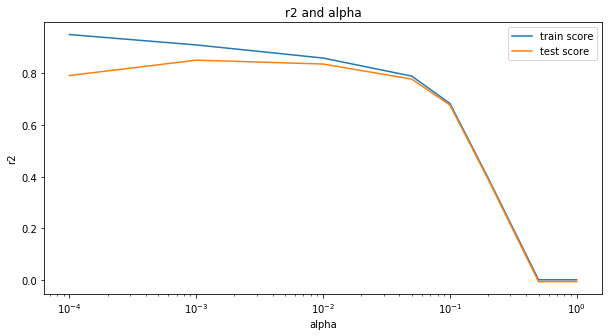

In [589]:
# plotting mean test and train scores with alpha 

# plotting
plt.figure(figsize=(10,5))
plt.plot(lassocv_results['param_alpha'], lassocv_results['mean_train_score'])
plt.plot(lassocv_results['param_alpha'], lassocv_results['mean_test_score'])
plt.xlabel('alpha')
plt.xscale('log')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

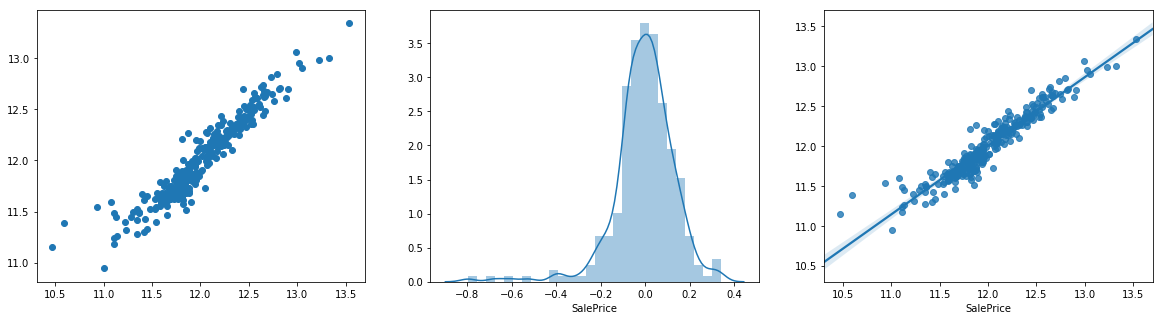

In [638]:
# understanding scatter, normal distribution of errors, line fit visual

res= y_test-y_test_pred

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.scatter(y_test, y_test_pred)
plt.subplot(1,3,2)
sns.distplot(res)
plt.subplot(1,3,3)
sns.regplot(y_test, y_test_pred)

Observation:
- We see that the straight line fits very nicely on plane.
- The errors do follow normal distribution.

###### Lets get 10 columns from Ridge and Lasso which are significant in predciting SalePrice

In [670]:
# getting 10 columns which are significant in determining the SalePrice according to Ridge Regression

df_ridge_reg_coef = pd.DataFrame(list(zip(ridge_reg.coef_,X_train.columns)),columns=['Coef','Variable'])
df_ridge_reg_coef.sort_values(by='Coef',ascending=False).head(10)

,Coef,Variable
3,0.081728,OverallQual
60,0.071476,Neighborhood_Crawfor
76,0.065421,Neighborhood_StoneBr
70,0.063258,Neighborhood_NridgHt
119,0.059245,Exterior1st_BrkFace
15,0.056147,GrLivArea
208,0.052375,Functional_Typ
80,0.046899,Condition1_Norm
45,0.046453,LandContour_HLS
194,0.046282,CentralAir_Y


In [664]:
# getting 10 columns which are significant in determining the SalePrice according to Lasso Regression

df_lasso_reg_coef = pd.DataFrame(list(zip(lasso_reg.coef_,X_train.columns)),columns=['Coef','Variable'])
df_lasso_reg_coef.sort_values(by='Coef',ascending=False).head(10)

,Coef,Variable
15,0.103426,GrLivArea
76,0.093321,Neighborhood_StoneBr
3,0.090922,OverallQual
70,0.089856,Neighborhood_NridgHt
60,0.085763,Neighborhood_Crawfor
119,0.083317,Exterior1st_BrkFace
24,0.052874,GarageCars
80,0.052734,Condition1_Norm
208,0.051343,Functional_Typ
194,0.050856,CentralAir_Y


In [660]:
# getting columns count where its coeffecient == 0 for Lasso
df_lasso_reg_coef[df_lasso_reg_coef['Coef']==0].shape

(270, 2)

In [640]:
df_lasso_reg_coef.sort_values(by='Coef',ascending=False).head(10).Variable.values

array(['GrLivArea', 'Neighborhood_StoneBr', 'OverallQual',
       'Neighborhood_NridgHt', 'Neighborhood_Crawfor',
       'Exterior1st_BrkFace', 'GarageCars', 'Condition1_Norm',
       'Functional_Typ', 'CentralAir_Y'], dtype=object)

In [641]:
df_ridge_reg_coef.sort_values(by='Coef',ascending=False).head(10).Variable.values

array(['OverallQual', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr',
       'Neighborhood_NridgHt', 'Exterior1st_BrkFace', 'GrLivArea',
       'Functional_Typ', 'Condition1_Norm', 'LandContour_HLS',
       'CentralAir_Y'], dtype=object)

#### 5. Conclusion

- As per business goal given, we have built regularized regression model using Ridge and Lasso.
- The Ridge has more better R2 scores when compared to Lasso.
- Both of the models have provided best variables which will help company for predicitve analysis.


- Ridge regression alpha = 20
- Ridge columns as below:

    ['OverallQual', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr',
       'Neighborhood_NridgHt', 'Exterior1st_BrkFace', 'GrLivArea',
       'Functional_Typ', 'Condition1_Norm', 'LandContour_HLS',
       'CentralAir_Y']


- Lasso regression alpha = 0.001
- Lasso Columns as below: 

    ['GrLivArea', 'Neighborhood_StoneBr', 'OverallQual',
       'Neighborhood_NridgHt', 'Neighborhood_Crawfor',
       'Exterior1st_BrkFace', 'GarageCars', 'Condition1_Norm',
       'Functional_Typ', 'CentralAir_Y']
       
- Lasso in turn does feature engineering as we can see the coeffecient of 270 features out of 356 are brought to 0, resulting 86 columns being processed.